## Spark funds -  Asset Management Company

<b> Objective </b> - CEO of our company wants to invest money in few companies. Her investments will be guided by global trend in the investments (on where do most of the investors are investing)

<b> Constraints </b>-

<ul>
    <li> Wants to do investment in the range of 5 to 15 USM million dollars </li>
    <li> Wants to do investment in only English speaking countries </li>
</ul>

<b> Buisness Objective </b>-

To invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

<b> Data analusis Objectives </b> -

<ul>
    <li> To understand which Investment types are attracting the most of the investments. </li>
    <li> To understand which are the countries attracting most of the investments.  </li>
    <li> To understand which are the Main sectors (8 main) attracting most of the investments.  </li>
</ul>


# Stage 1 - Loading data from files

In [1]:
# import all libraries for this stage
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup as soup

In [2]:
companies = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\First Assignment\csv\companies.csv", encoding='ISO 8859-1')
rounds2 = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\First Assignment\csv\rounds2.csv", encoding='ISO 8859-1')
mapping = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\First Assignment\csv\mapping.csv")

In [3]:
# analyse companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
# analyse rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# Initial Analysis

## No of unique companies in companies

In [5]:
companies.permalink.nunique()

66368

## No of unique companies in rounds2

In [6]:
rounds2.company_permalink.nunique()

90247

### Let's see which colums are contenstant for to be unique, broadly there are two <font color ='red'> name </font>  and <font color ='red'> permalink</font> 
Now let's see whether this columns contain any duplicate data or not

In [7]:
companies[companies.permalink.duplicated()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [8]:
companies.name[companies.name.duplicated()]

282         3DIVAZ
1527        Adtena
1996         Agora
3006        Amicus
3091     Amplitude
           ...    
64571       Wunder
64572       Wunder
65799        Gusto
65899        Zesty
66029      ZingBox
Name: name, Length: 268, dtype: object

In [9]:
companies[companies.name.duplicated()].head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
282,/Organization/3Divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
1527,/Organization/Adtena-2,Adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1996,/Organization/Agora-6,Agora,https://www.agora.co,Android|Apps|Internet|Mobile,operating,USA,NY,New York City,New York,01-07-2013
3006,/Organization/Amicus-Co,Amicus,http://www.amicus.co,Apps|Mobile|Mobile Commerce,operating,IND,7,New Delhi,New Delhi,01-01-2015
3091,/Organization/Amplitude-2,Amplitude,http://amplitude-technologies.com/,Electronics,operating,FRA,A8,Ãâ°vry,Ãvry,01-01-2001


Clearly as we can see we have more unique values for parmalink in rounds2 than unique values for same column in companies we can conclude that <b> rounds2 has value present in permalink which are not there in companies dataframe</b>.

As we can from above data that <font color ='red'> name </font> column has duplicate data whereas <font color ='red'> permalink </font> has no duplicate data. And where name is duplicated there we have different permalink. So it's clear we that we have to take <b> permalink as our unique column. </b>

# Step 2 - Merging the two dataframes

As we can from observation that word <b> Organization </b> is has differnt structure (Somewhere starts with O somewhere o) we have to make changes in order get common structure.

So let's lowercase permalink in both the column, before that we have to change name of column company_permalink from rounds2 dataframe to permalink

Before this let's rename company_permalink to permalink for better understanding

In [10]:
rounds2 = rounds2.rename(columns={'company_permalink':'permalink'})

In [11]:
#converting values to lower case for permalink
rounds2.permalink = rounds2.permalink.apply(lambda x : str.lower(x))
companies.permalink = companies.permalink.apply(lambda x : str.lower(x))

### Merging two dataframes, using left as we've additional data in rounds2

In [12]:
master_frame = pd.merge(left=rounds2,right=companies,how='left',left_on='permalink',right_on='permalink')
master_frame.head(5)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


# Step 2 - Data cleaning and Mining

Let's try to find out which column has null or blank values.
Let's plot heat map of null values in each column

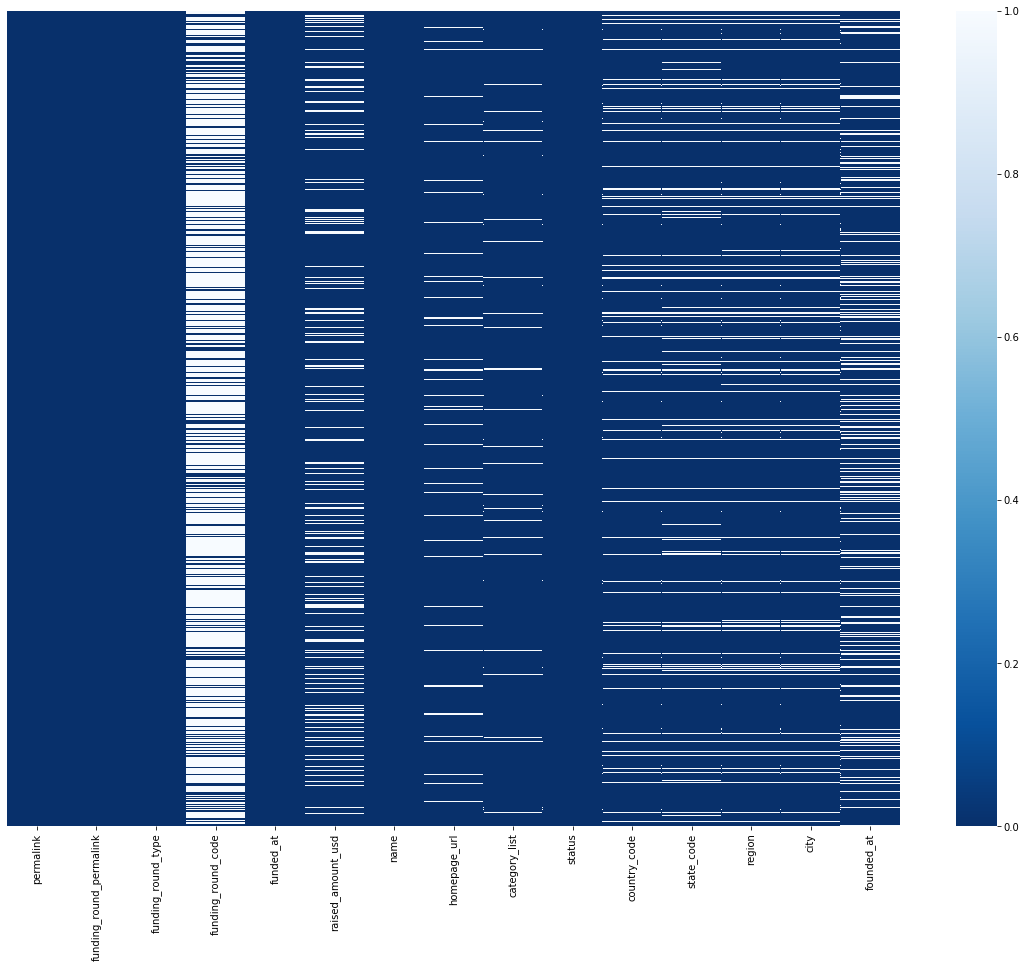

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(master_frame.isnull(),cbar=True, yticklabels=False, cmap="Blues_r" )

We can see from above heatmap that funding_round_code and founded_at fields have most of the null or blank values.
Now let's try to figure out which are the columns which are necessary for our analysis so that we can get rid of other columns.

<ul>
    <li>permalink - It's necessary as it contains unique id</li>
    <li>funding_round_permalink - Not necessary</li>
    <li>funding_round_type - Necessary</li>
    <li>funding_round_code - Not necessary</li>
    <li>funded_at - Necessary</li>
    <li>raised_amount_usd - Necessary</li>
    <li>name - Necessary</li>
    <li>homepage_url - Not necessary</li>
    <li>category_list - Necessary</li>
    <li>status - necessary</li>
    <li>country_code - necessary</li>
    <li>state_code - Not necessary</li>
    <li>region - Not necessary</li>
    <li>city - Not necessary</li>
    <li>founded_at - Necessary</li>
</ul>

In [14]:
master_frame = master_frame[['permalink', 'funding_round_type', 'funded_at', 'raised_amount_usd', 'name','category_list', 'status', 'country_code','founded_at']]

Let's see now how many null values are present

### Only selecting those fund types in which company is interested (We can do this as funding_round_type has no blank or null values)

In [15]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','seed','private_equity','angel'])]

In [16]:
master_frame

,permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at
0,/organization/-fame,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN
1,/organization/-qounter,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014
2,/organization/-qounter,seed,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014
3,/organization/-the-one-of-them-inc-,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN
4,/organization/0-6-com,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,01-01-2007
...,...,...,...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,seed,01-11-2011,7000.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,13-05-2012
114943,/organization/zzzzapp-com,seed,01-08-2013,33149.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,13-05-2012
114945,/organization/zzzzapp-com,seed,01-05-2013,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,13-05-2012
114946,/organization/ãeron,venture,01-08-2014,NaN,ÃERON,NaN,operating,NaN,01-01-2011


In [17]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
funded_at                 0
raised_amount_usd     13770
name                      8
category_list          2501
status                    7
country_code           7321
founded_at            16725
dtype: int64

<b> As our analysis it depends on amount of money raised we can't allow those rows which have null or blank values for raised_amounnt_usd </b>

In [18]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [19]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
funded_at                 0
raised_amount_usd         0
name                      2
category_list           856
status                    1
country_code           5021
founded_at            13447
dtype: int64

As we have to find top performing countries we can't ignore data where country is not preset besides we could have founded the name of the country by fetching details on city but as even that information is not present we're simply dropping all the rows.

In [20]:
master_frame = master_frame[~master_frame.country_code.isnull()]

Now there are two columns which have null values let's keep blank values for category_list for analysis to see whether we can
get any useful insight from it or not and let's ignore founded_at column for now

In [21]:
master_frame.reset_index(inplace=True)
master_frame

,index,permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at
0,0,/organization/-fame,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN
1,2,/organization/-qounter,seed,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014
2,4,/organization/0-6-com,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,01-01-2007
3,7,/organization/0ndine-biomedical-inc,seed,11-09-2009,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,01-01-1997
4,8,/organization/0ndine-biomedical-inc,venture,21-12-2009,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,01-01-1997
...,...,...,...,...,...,...,...,...,...,...
75601,114941,/organization/zznode-science-and-technology-co...,venture,01-04-2012,1587301.0,ZZNode Science and Technology,Enterprise Software,operating,CHN,NaN
75602,114942,/organization/zzzzapp-com,seed,01-11-2011,7000.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,13-05-2012
75603,114943,/organization/zzzzapp-com,seed,01-08-2013,33149.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,13-05-2012
75604,114945,/organization/zzzzapp-com,seed,01-05-2013,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,13-05-2012


### Finding mean for each type of funding type

In [22]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel             9.685599e+05
private_equity    7.361856e+07
seed              7.481045e+05
venture           1.173578e+07
Name: raised_amount_usd, dtype: float64

### As company wants to do investment in the range of 5M to 15M only venture is satisfying the condition

In [23]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000, inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

### So selecting only those rows which has funding type as venture

In [24]:
master_frame = master_frame[master_frame.funding_round_type == 'venture']

## Now let's merge master_dataframe with mapping sheet (which contains mapping of categories with main sector)

In [25]:
mapping['main_sector'] = mapping.loc[:,mapping.columns[1]:].dot(mapping.columns[1:])

In [26]:
mapping = mapping[['category_list','main_sector']]

<b>Let's merge the mapping file and master_frame</b>

Before that we have to process those categories which have multiple secotors.

In [27]:
master_frame.category_list = master_frame.category_list.apply(lambda x: str(x).split("|")[0])

F:\Amar-AIML\Softwares\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
master_frame = pd.merge(left=master_frame,right=mapping,how='inner',left_on='category_list',right_on='category_list')
master_frame.tail(50)

,index,permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,main_sector
44642,85167,/organization/rxwiki,venture,16-10-2015,5745869.0,"RxWiki, Inc.",Independent Pharmacies,operating,USA,01-03-2012,Health
44643,100827,/organization/tikvah-therapeutics,venture,14-07-2007,10000000.0,Tikvah Therapeutics,Independent Pharmacies,operating,USA,NaN,Health
44644,86006,/organization/sava-transmedia,venture,28-04-2011,3152231.0,Sava Transmedia,Social Games,operating,CAN,01-05-2011,"Social, Finance, Analytics, Advertising"
44645,86377,/organization/schweiger-dermatology,venture,15-01-2015,12400000.0,Schweiger Dermatology,Cosmetic Surgery,operating,USA,NaN,Health
44646,110317,/organization/whatclinic-com,venture,30-08-2012,2508800.0,WhatClinic.com,Cosmetic Surgery,operating,IRL,05-11-2006,Health
44647,88200,/organization/seven-networks,venture,14-12-2006,42000000.0,SEVEN Networks,Mobile Infrastructure,operating,USA,01-01-2000,Manufacturing
44648,88201,/organization/seven-networks,venture,10-05-2006,20000000.0,SEVEN Networks,Mobile Infrastructure,operating,USA,01-01-2000,Manufacturing
44649,88481,/organization/sharethe,venture,01-01-2012,1551791.0,ShareThe,Soccer,closed,GBR,25-03-2013,Automotive & Sports
44650,93802,/organization/sport-street,venture,01-08-2012,1250000.0,Sport Street,Soccer,operating,USA,01-03-2011,Automotive & Sports
44651,89227,/organization/shuttlerock,venture,18-09-2014,2350000.0,Shuttlerock,Social Media Marketing,operating,NZL,01-06-2011,"Social, Finance, Analytics, Advertising"


Let's get the details of the countries which have english as there official language of communication

<b> Now we have to see which countries are English speaking countries for this we will use web scrapping technique to get data 
from wikipedia. </b>

In [29]:
from bs4 import BeautifulSoup 
def en_con_details():
    r = requests.get("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language") 
    soup = BeautifulSoup(r.text, 'lxml') # Parse the HTML as a string
    table = soup.find_all('table')
    
    headers = []
    tb = 0
    global  off_en_counts
    r = 1
    r_len = len(table[0].find_all('tr')) + len(table[1].find_all('tr'))
    while tb < 2:
        t = table[tb]
        tr_elements = t.find_all('tr')
        for i in range(0,len(tr_elements)):
            
            if i == 0 :
                r -= 1
                if tb == 0:
                    for j in tr_elements[i].find_all('th'):
                        headers.append(str.strip(j.text))
                    off_en_counts = pd.DataFrame([],columns=headers,index=range(0,r_len-2))
            elif i != 0:
                l = 0
                for k in tr_elements[i].find_all('td'):
                    off_en_counts.iloc[r-1,l] = str.strip(k.text)
                    l+=1
            r+=1
        tb+=1
    return off_en_counts

In [30]:
off_en_counts = en_con_details()  

Let's do data cleaning and remove unwanted columns

In [31]:
off_en_counts.drop(['Nr','Region','Population','Primary language?'], axis=1,inplace=True)
off_en_counts['Country'] = off_en_counts['Country'].apply(lambda x : x.split("[")[0])

Now let's merge the <b>off_en_counts </b> and <b> master_frame </b>

In [32]:
off_en_counts = off_en_counts.rename(columns={'Alpha-3 code':'country_code'})

In [33]:
master_frame = pd.merge(left=master_frame,right=off_en_counts,how='inner',left_on='country_code',right_on='country_code')

In [34]:
master_frame.reset_index(drop=True,inplace=True)

In [35]:
master_frame

,index,permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,main_sector,Country
0,0,/organization/-fame,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN,Entertainment,India
1,58842,/organization/manas-informatics,venture,02-02-2008,160000.0,Manas Informatic,Media,operating,IND,05-05-2007,Entertainment,India
2,9984,/organization/babajob,venture,28-04-2015,10000000.0,Babajob,Curated Web,operating,IND,27-08-2007,"News, Search and Messaging",India
3,11685,/organization/bharat-matrimony,venture,05-02-2008,11750000.0,Bharat Matrimony,Curated Web,operating,IND,12-03-1969,"News, Search and Messaging",India
4,13711,/organization/bluestone-com,venture,24-01-2012,5000000.0,Bluestone.com,Curated Web,operating,IND,01-01-2011,"News, Search and Messaging",India
...,...,...,...,...,...,...,...,...,...,...,...,...
38083,33266,/organization/eventcombo,venture,14-04-2014,150000.0,EventCombo,Digital Media,operating,TTO,01-01-2013,Entertainment,Trinidad and Tobago
38084,33983,/organization/expertplan,venture,01-11-2002,4350000.0,ExpertPlan,Technology,operating,TTO,NaN,Others,Trinidad and Tobago
38085,33984,/organization/expertplan,venture,16-10-2001,4000000.0,ExpertPlan,Technology,operating,TTO,NaN,Others,Trinidad and Tobago
38086,32868,/organization/esoko,venture,27-05-2014,1500000.0,Esoko Networks,Agriculture,operating,MUS,01-01-2006,Manufacturing,Mauritius


In [36]:
test = master_frame.groupby(['country_code','category_list'])['raised_amount_usd'].agg(['sum','mean']).sort_values(by='sum',ascending=False)

In [37]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38088 entries, 0 to 38087
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               38088 non-null  int64  
 1   permalink           38088 non-null  object 
 2   funding_round_type  38088 non-null  object 
 3   funded_at           38088 non-null  object 
 4   raised_amount_usd   38088 non-null  float64
 5   name                38088 non-null  object 
 6   category_list       38088 non-null  object 
 7   status              38088 non-null  object 
 8   country_code        38088 non-null  object 
 9   founded_at          31811 non-null  object 
 10  main_sector         38088 non-null  object 
 11  Country             38088 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.5+ MB


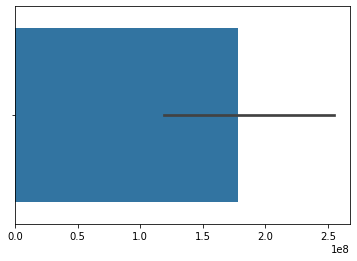

In [38]:
sns.barplot(test)

In [44]:
del master_frame['index']

,permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,main_sector,Country
0,/organization/-fame,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN,Entertainment,India
1,/organization/manas-informatics,venture,02-02-2008,160000.0,Manas Informatic,Media,operating,IND,05-05-2007,Entertainment,India
2,/organization/babajob,venture,28-04-2015,10000000.0,Babajob,Curated Web,operating,IND,27-08-2007,"News, Search and Messaging",India
3,/organization/bharat-matrimony,venture,05-02-2008,11750000.0,Bharat Matrimony,Curated Web,operating,IND,12-03-1969,"News, Search and Messaging",India
4,/organization/bluestone-com,venture,24-01-2012,5000000.0,Bluestone.com,Curated Web,operating,IND,01-01-2011,"News, Search and Messaging",India
...,...,...,...,...,...,...,...,...,...,...,...
38083,/organization/eventcombo,venture,14-04-2014,150000.0,EventCombo,Digital Media,operating,TTO,01-01-2013,Entertainment,Trinidad and Tobago
38084,/organization/expertplan,venture,01-11-2002,4350000.0,ExpertPlan,Technology,operating,TTO,NaN,Others,Trinidad and Tobago
38085,/organization/expertplan,venture,16-10-2001,4000000.0,ExpertPlan,Technology,operating,TTO,NaN,Others,Trinidad and Tobago
38086,/organization/esoko,venture,27-05-2014,1500000.0,Esoko Networks,Agriculture,operating,MUS,01-01-2006,Manufacturing,Mauritius


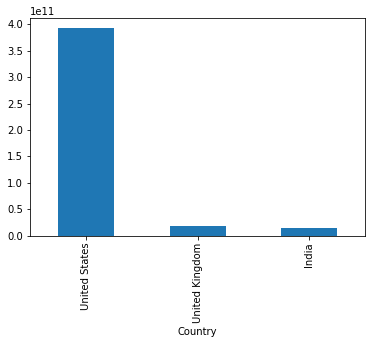

In [55]:
master_frame.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3].plot.bar()

In [62]:
final = master_frame[master_frame.country_code.isin(['USA','IND','GBR'])]

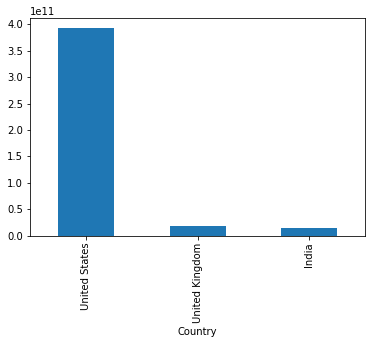

In [63]:
final.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False).plot.bar()

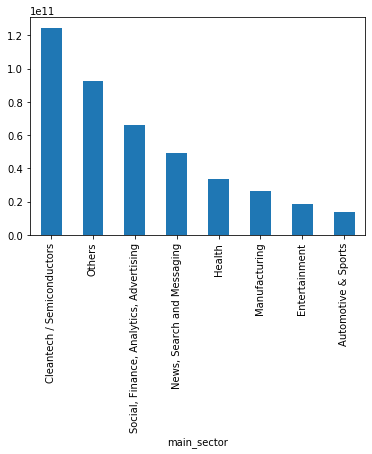

In [66]:
final.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).plot.bar()

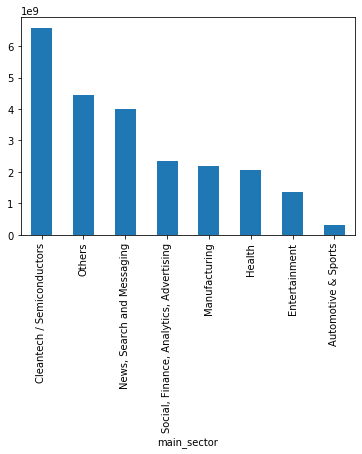

In [67]:
final[final.status == 'closed'].groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).plot.bar()

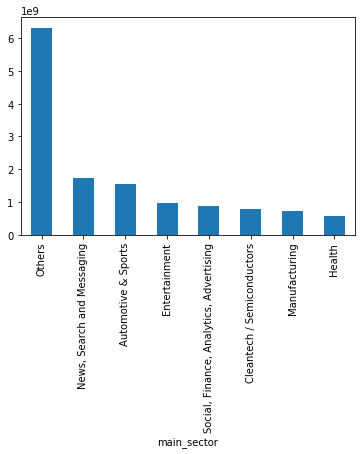

In [68]:
final[final.country_code == 'IND'].groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).plot.bar()

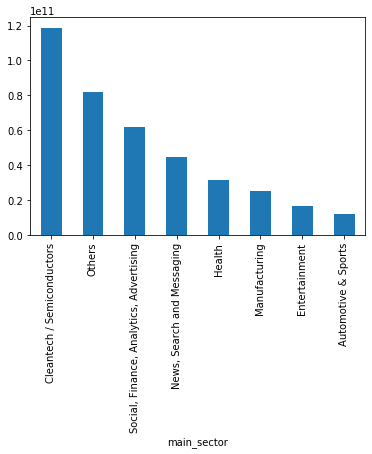

In [70]:
final[final.country_code == 'USA'].groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).plot.bar()

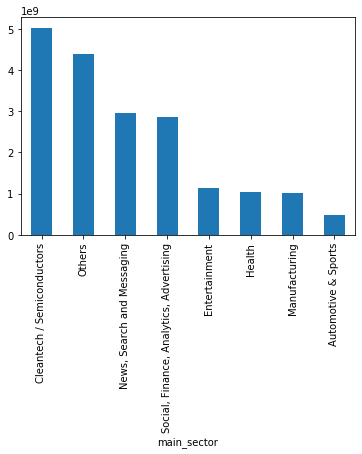

In [71]:
final[final.country_code == 'GBR'].groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).plot.bar()

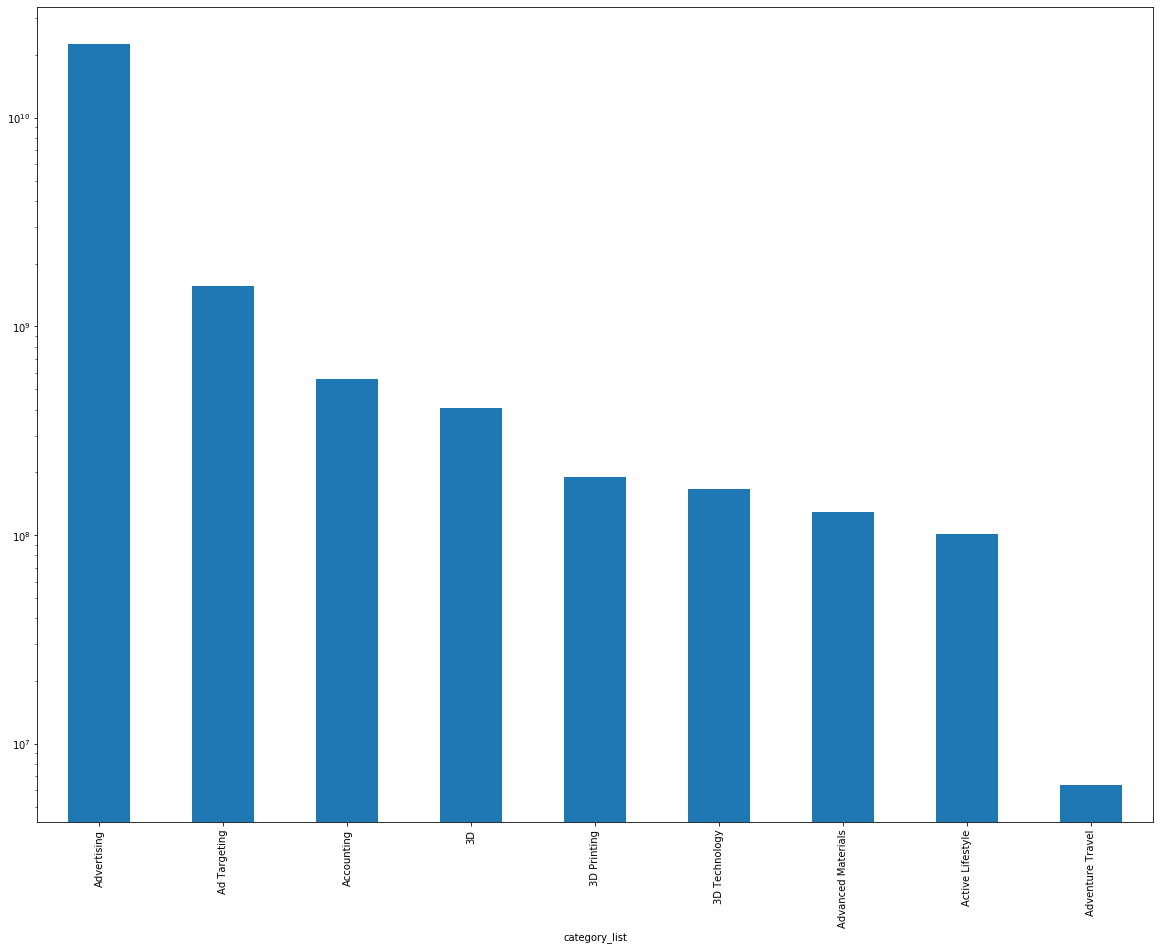

In [77]:
plt.figure(figsize=(20,15))
plt.yscale('log')
final.groupby('category_list')['raised_amount_usd'].sum()[0:9].sort_values(ascending=False).plot.bar()

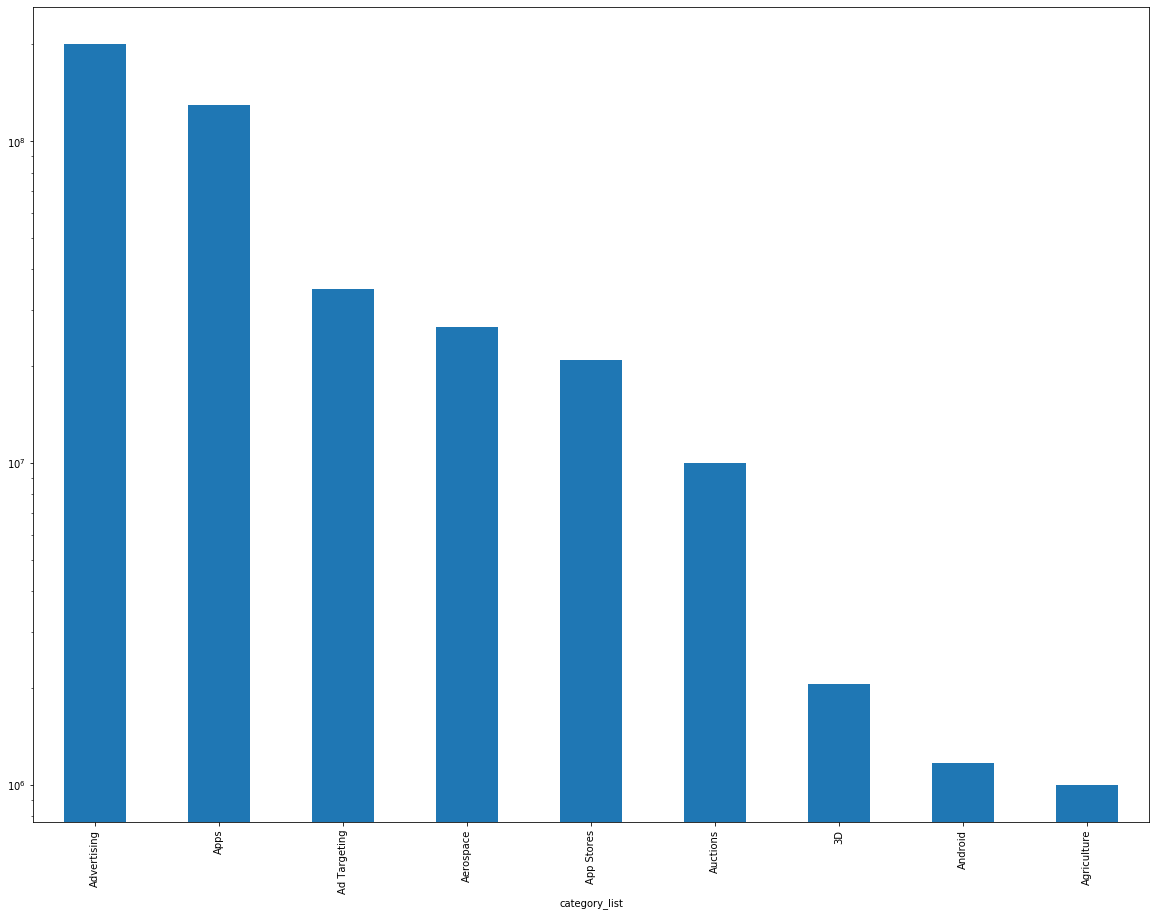

In [78]:
plt.figure(figsize=(20,15))
plt.yscale('log')
final[final.country_code == 'IND'].groupby('category_list')['raised_amount_usd'].sum()[0:9].sort_values(ascending=False).plot.bar()